In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (12, 12)

## Fitting to Data

In [3]:
def fit_to_image(data, path, name, xlabel, ylabel):

    # Unpack the data dictionary and get the polynomial of best fit
    xp, yp, degree, xlim, ylim = data.values()
    f = np.poly1d(np.polyfit(xp, yp, degree))

    # Create the figure and plot the polynomial of best fit
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(frameon = False)
    xs = np.linspace(0, xlim[1], 200)
    ax.plot(xs, f(xs), color = "black")
    ax.scatter(xp, yp, marker=".", color = "black")
    ax.set(xlim = xlim, ylim = ylim, xlabel = xlabel, ylabel = ylabel)

    # Overlay the plot with the given image path
    img = plt.imread(path)
    w, h, n = img.shape
    img_axes = fig.add_axes(
        ax.get_position(),
        zorder = -1,
        xticks = [],
        yticks = [],
        xlim = (0, h)
    )
    plot = img_axes.imshow(img, aspect="auto")
    plot.set_alpha(0.6)

    # Return the function as a lambda that returns constant outside the domain
    fig.savefig("../img/data/" + name, bbox_inches = 'tight')
    return np.vectorize(lambda p : f(p) if p < xlim[1] else f(xlim[1]))

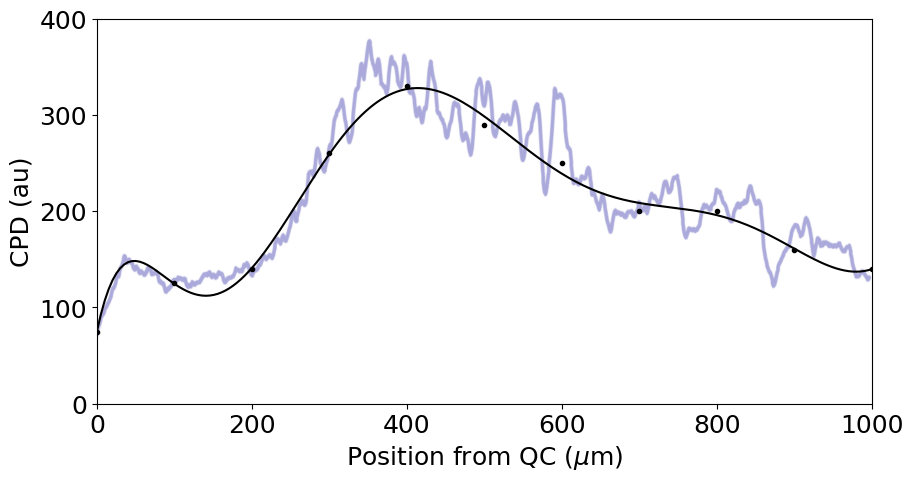

In [4]:
# Find CPD function of best fit
cpd_data = {
    "xp": list(range(0, 1100, 100)),
    "yp": [75, 125, 140, 260, 330, 290, 250, 200, 200, 160, 140],
    "degree": 8, 
    "xlim": (0, 1000),
    "ylim": (0, 400)
}

cpd = fit_to_image(cpd_data, "../assets/cpd.png", "fit-cpd", 
                   r"Position from QC ($\mu$m)", "CPD (au)")             

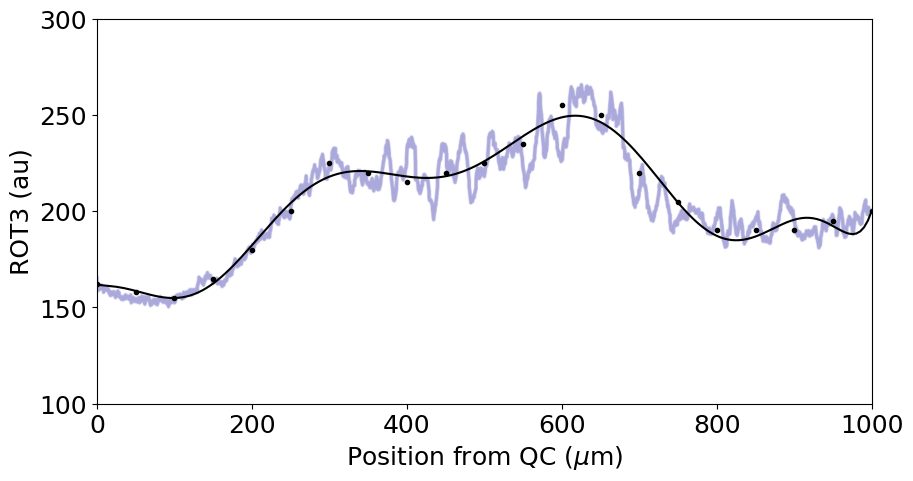

In [5]:
# Find ROT3 function of best fit
rot_data = {
    "xp": list(range(0, 1050, 50)),
    "yp": [162, 158, 155, 165, 180, 200, 225, 220, 215, 220, 
           225, 235, 255, 250, 220, 205, 190, 190, 190, 195, 200],
    "degree": 10,
    "xlim": (0, 1000),
    "ylim": (100, 300)
}

rot = fit_to_image(rot_data, "../assets/rot3.png", "fit-rot3", 
                   r"Position from QC ($\mu$m)", "ROT3 (au)") 

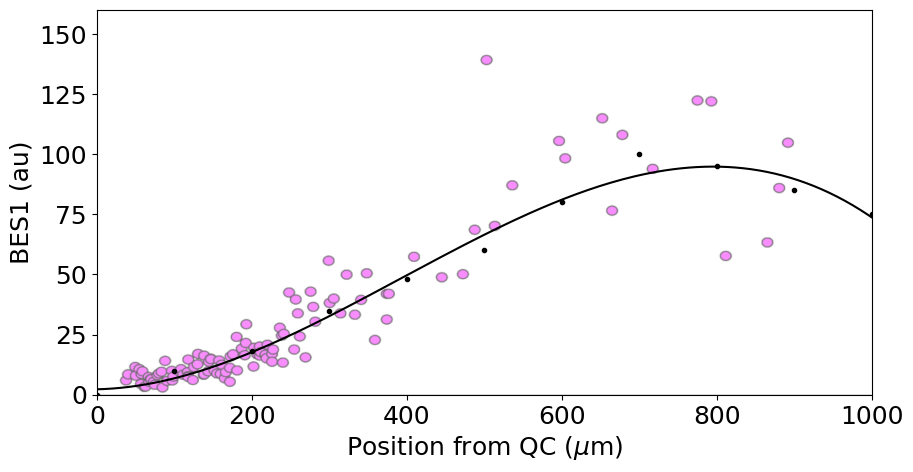

In [6]:
# Find BES1 function of best fit
bes_data = {
    "xp": list(range(0, 1100, 100)),
    "yp": [0, 10, 18, 35, 48, 60, 80, 100, 95, 85, 75],
    "degree": 3,
    "xlim": (0, 1000),
    "ylim": (0, 160)
}

bes = fit_to_image(bes_data, "../assets/bes1.png", "fit-bes1", 
                   r"Position from QC ($\mu$m)", "BES1 (au)") 

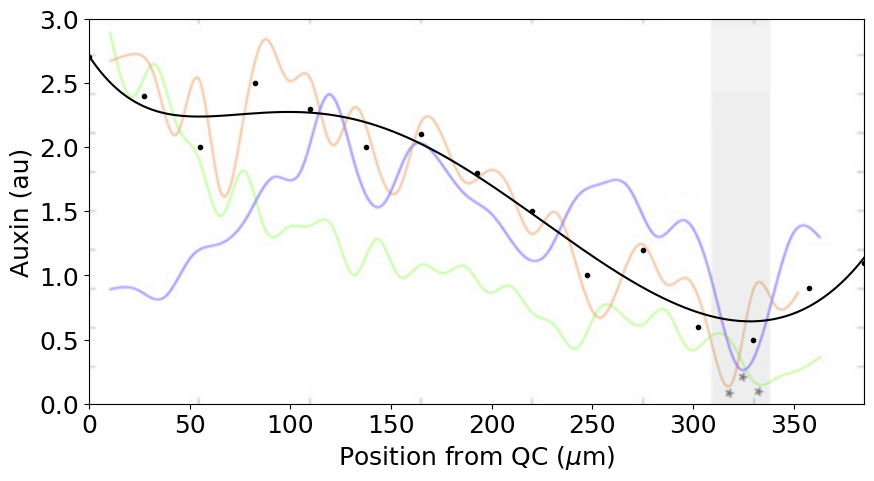

In [7]:
# Find cell position vs. auxin function of best fit. 
# Assume an average cell size of 11um in the measured section of the root.
aux_data ={
    "xp": list(np.arange(0, 412.5, 27.5)),
    "yp": [2.7, 2.4, 2.0, 2.5, 2.3, 2.0, 2.1, 1.8, 1.5, 1.0, 1.2, 0.6, 0.5, 0.9, 1.1],
    "degree": 6,
    "xlim": (0, 385),
    "ylim": (0, 3)
}

aux = fit_to_image(aux_data, "../assets/auxin.png", "fit-auxin", 
                   r"Position from QC ($\mu$m)", "Auxin (au)") 

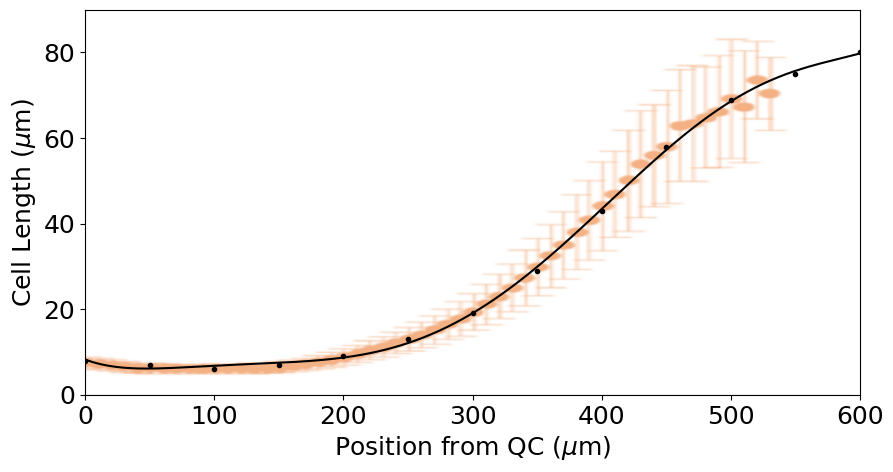

In [8]:
# Find size function of best fit
length_data = {
    "xp": list(range(0, 650, 50)),
    "yp": [8, 7, 6, 7, 9, 13, 19, 29, 43, 58, 69, 75, 80],
    "degree": 6,
    "xlim": (0, 600),
    "ylim": (0, 90)
}

length = fit_to_image(length_data, "../assets/sizes.png", "fit-sizes", 
                      r"Position from QC ($\mu$m)", r"Cell Length ($\mu$m)") 

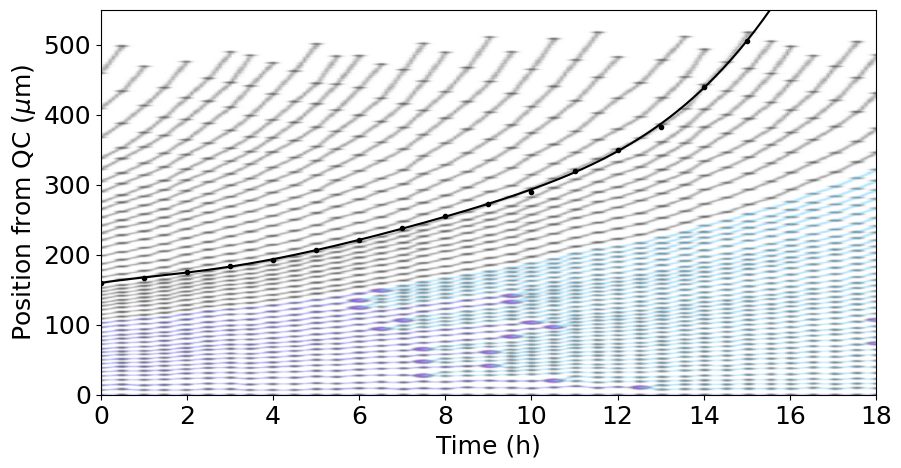

In [9]:
# Find time to position function of best fit
position_data = {
    "xp": list(range(16)),
    "yp": [160, 167, 175, 184, 192, 207, 221, 238, 255, 273, 290, 320, 350, 383, 440, 505],
    "degree": 6,
    "xlim": (0, 18),
    "ylim": (0, 550)
}

position = fit_to_image(position_data, "../assets/files.png", "fit-position",
                        "Time (h)", r"Position from QC ($\mu$m)") 

## Approximate BR Function

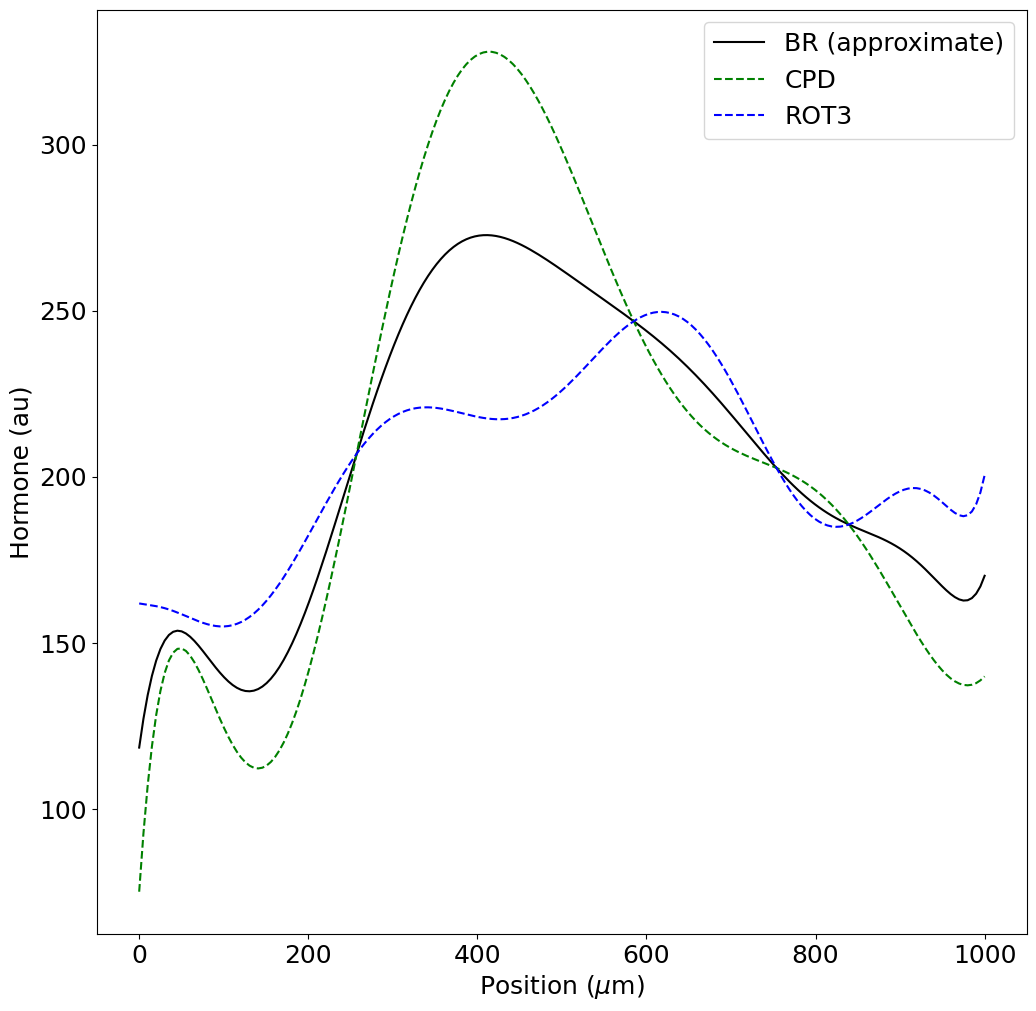

In [10]:
# Get the BR precusors as a function of time
xs = np.linspace(0, 1000, 200)
BR = lambda p : (cpd(p) + rot(p)) / 2

plt.plot(xs, BR(xs), "k-", label = "BR (approximate)")
plt.plot(xs, cpd(xs), "g--", label = "CPD")
plt.plot(xs, rot(xs), "b--", label = "ROT3")
plt.xlabel(r"Position ($\mu$m)")
plt.ylabel("Hormone (au)")
plt.legend()
plt.savefig("../img/data/fit-br.png")
plt.show()

## Export Data to JSON

In [11]:
import json
with open('data.json', 'w', encoding='utf-8') as f:
    data = {
        "CPD": cpd_data, 
        "ROT3": rot_data, 
        "BES1": bes_data,
        "AUXIN": aux_data,
        "LENGTH": length_data,
        "POSITION": position_data
    }
    json.dump(data, f, ensure_ascii=False, indent=4)